<h1>PREENCHENDO REGIÕES</h1>

<h2>Sumário</h2>
    
[1. Introdução](#introducao)<br>
[2. Script de rotulação simples](#script1)<br>
&nbsp;&nbsp;&nbsp;&nbsp;[2.1 Bibliotecas](#bibliotecas)<br>
&nbsp;&nbsp;&nbsp;&nbsp;[2.2 Função de rotulação](#funcao1)<br>
&nbsp;&nbsp;&nbsp;&nbsp;[2.3 Resultados](#result1)<br>
&nbsp;&nbsp;&nbsp;&nbsp;[2.4 Função de rotulação modificada](#modif)<br>
[3. Script de contagem de objetos com buracos](#script2)<br>
&nbsp;&nbsp;&nbsp;&nbsp;[3.1 Função de remoção dos objetos da borda](#funcao2)<br>
&nbsp;&nbsp;&nbsp;&nbsp;[3.2 Função de rotulação dos objetos com buracos](#funcao3)<br>
&nbsp;&nbsp;&nbsp;&nbsp;[3.3 Resultados](#result2)<br>

<a id='introducao'></a>

<h2>1. Introdução</h2>

<p style='text-align: justify;'>Este exercício tem com objetivo o entendimento do processo de contagem de objetos presentes em uma datrerminada imagem. A contagem é feita ao encontrar o conjunto de pixels que compõem um determinado objeto, que deve estar inicialmente em uma imagem binária (cores preta e branca).</p>

<p style='text-align: justify;'> Uma possível forma de identificar este conjunto de pixels é alterando sua cor para uma que não seja branco ou preto. Este processo consiste em uma forma de rotulação dos objetos através de suas cores.</p>

<a id='script1'></a>

<h2>2. Script de rotulação simples</h2>

<p style='text-align: justify;'>Esta seção descreverá um script realizado em Python que recebe uma imagem binária contendo uma determinada quantidade de objetos e realiza a rotulação e contagem destes.</p>

<a id='bibliotecas'></a>

<h3>2.1 Bibliotecas</h3>

<p style='text-align: justify;'>Inicialmente, importa-se as bibliotecas necessárias para a realização dos algoritmos. A primeira consiste na biblioteca do openCV para Python, utilizada para todo o tratamento de imagem. O numpy é utilizado para trabalhar com as matrizes da simagens. O Matplotlib foi utilizado para a exibição das imagens <i>inline</i> no <i>Jupyter Notebook</i>.</p>

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

<a id='funcao1'></a>

<h3>2.2 Função de rotulação</h3>

<p style='text-align: justify;'>A função "labeling" realiza a contagem de objetos em uma imagem em preto (cor de fundo) e branco (objetos). Esta função recebe como parâmetro uma matriz de uma imagem, a cor dos objetos que devem ser rotulados e uma flag para indicar se a função irá exibir as imagens. Em seguida, tem-se o método de contagem de objetos. A matriz é varrida e procura-se pixels com a cor definida por parâmetro. Ao encontrar estes pixels, incrementa-se o contador de objetos, visto que um pixel branco faz parte de um objeto.</p>

<p style='text-align: justify;'>Em seguida, neste pixel encontrado, aplica-se o algoritmo do <i>Flood fill</i> para que toda a área do objeto receba a cor do contador de objetos, de forma a rotulá-lo, ou seja, diferenciar a cor do objeto contado da cor dos objetos seguintes. Finalizado o processo de percorrer a matriz, a imagem após a rotulação dos objetos através de cores diferentes pode ser exibida e a contagem de objetos é retornada.</p>

In [2]:
def labeling(image_name, objectColor = 255, show_img = True):
    if show_img:
        plt.figure(1,[15,15])
        plt.subplot(121)
        plt.imshow(img,cmap="gray")
        plt.axis("off")
        plt.title("Imagem original")
    
    nobjects = 0
    for i in range(np.shape(img)[0]):
        for j in range(np.shape(img)[1]):
            if img[i,j] == objectColor:            
                nobjects += 1
                cv2.floodFill(img,None,(j,i),nobjects)   
                    
    if show_img:
        plt.subplot(122)
        plt.imshow(img,cmap="gray")
        plt.axis("off")
        plt.title("Imagem com objetos rotulados")
    
    return nobjects

<a id='result1'></a>

<h3>2.3 Resultados</h3>

<p style='text-align: justify;'>Abaixo tem-se um exemplo de utilização do algoritmo. Percebe-se que neste caso, a contagem foi feita de forma correta e é perceptível na imagem da direita que ao longo da matriz, as cores dos objetos vão ficando cada vez mais claras devido ao processo de rotulação.</p>

Foram contados 32 objetos na figura


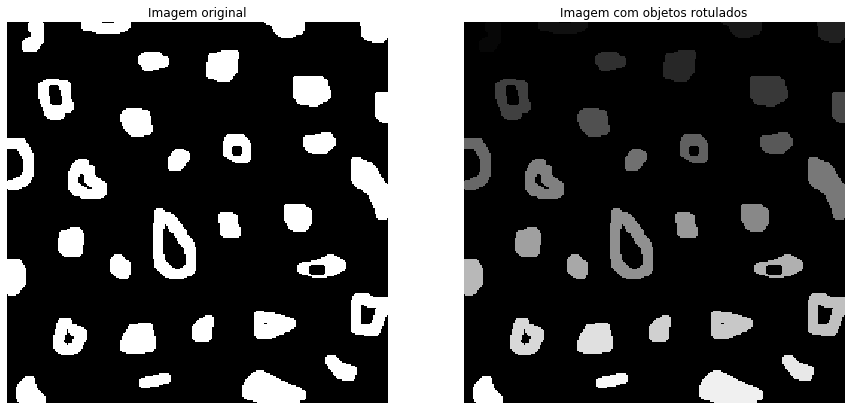

In [3]:
img = cv2.imread("..\\images\\bolhas.png",0)
print("Foram contados " + str(labeling(img)) + " objetos na figura")

<p style='text-align: justify;'>Porém, este algoritmo tem uma grande limitação da forma que está implementado acima. Devido ao fato de que é utilizada apenas uma matriz com valores de 8 bits, as cores só podem ser representadas em um intervalo $[0,255]$. Como a cor atribuída à imagem é o contador de objetos, o algoritmo só consegue contar até 254 objetos, visto que as cores 0 e 255 são atribuídas ao fundo e aos objetos, respectivamente. Abaixo há um exemplo de utilização em uma imagem com 254 objetos, onde a contagem é feita de forma apropriada.</p>

Foram contados 254 objetos na figura


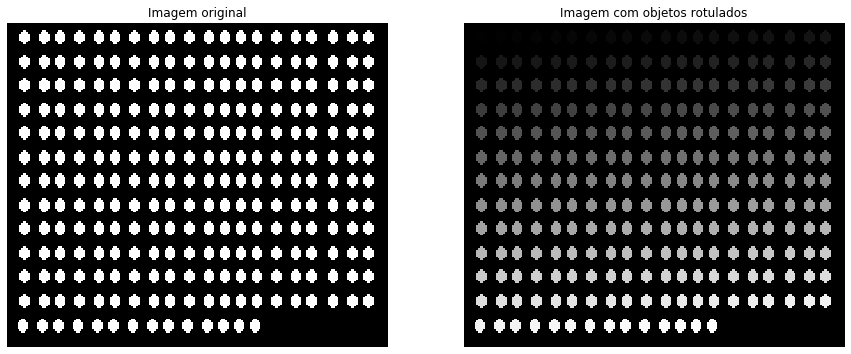

In [4]:
img = cv2.imread("..\\images\\bolhas254.png",0)
print("Foram contados " + str(labeling(img)) + " objetos na figura")

<p style='text-align: justify;'>A imagem utilizada no exemplo abaixo possui apenas uma bolha a mais em relação a anterior, porém, a contagem excedeu em 35 objetos em relação ao que era esperado. O que acontece é que o último objeto recebeu a cor 255 e o <i>Flood fill</i> foi utilizado com a mesma cor que o objeto já possuía. Ao encontrar novamente um pixel deste último objeto, este possuirá a cor 255, como se não tivesse sido contado. No final do processo, cada pixel do último objeto terá sido contado como um objeto diferente.</p>

Foram contados 290 objetos na figura


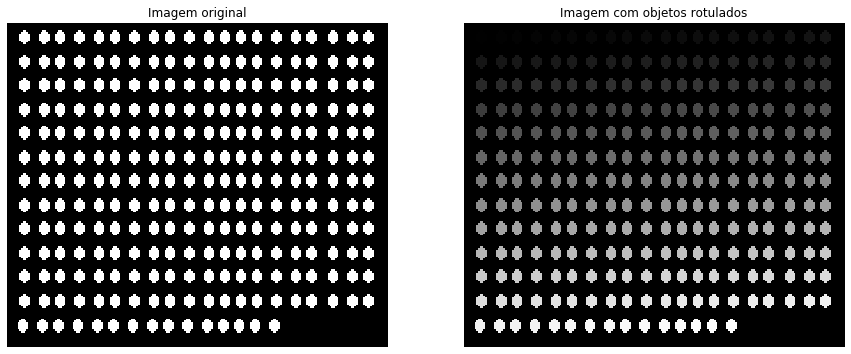

In [5]:
img = cv2.imread("..\\images\\bolhas255.png",0)
print("Foram contados " + str(labeling(img)) + " objetos na figura")

<a id='modif'></a>

<h3>2.4 Função de rotulação modificada</h3>


<p style='text-align: justify;'>Uma possível solução desta limitação da contagem é trabalhar ter como saída uma imagem colorida para expandir o limite de objetos que podem ser rotulados. A função abaixo é uma adaptação da função "labeling" realizada anteriormente. A função recebe como parâmetros uma matriz RGB ou em escala de cinza, a cor que deverá ser considerada para rotular os objetos, a cor inicial a partir da qual será incrementada para rotular os objetos, uma flag para exibir ou não as imagens e o número da figura onde serão exibidas as imagens.</p>

<p style='text-align: justify;'>Caso a matriz recebida por parâmetro possua apenas duas dimensões, está é convertida para uma de três representando uma imagem RGB. Caso a matriz recebida já corresponda à imagem RGB, nenhum processo é realizado. 

<p style='text-align: justify;'>Como a cor de fundo da imagem é definida por (0,0,0), a próxima cor diferente do fundo deverá ser (1,0,0), parâmetro <i>default</i> da função. O array colors irá armazenar as cores de início da contagem que serão incrementadas e aplicadas no <i>Flood fill</i>.</p>

<p style='text-align: justify;'>Em seguida, a matriz é percorrida e procura-se os objetos com cor a cor passada por parâmetro, sendo o <i>default</i>, os objetos serem brancos (255,255,255). Ao encontrar, o contador de objetos é incrementado e as cores RGB também através da função "increment_color". Este algoritmo possibilita uma contagem de até $(2^8\times2^8\times2^8)-2$, ou, $16.777.214$ objetos.</p>

<p style='text-align: justify;'>Finalizado o processo, a função irá retornar a quantidade de objetos rotulados, a última cor do incrementador de cores, a matriz modificada da imagem e os pontos da imagem onde começam os objetos rotulados.</p>

In [6]:
def increment_color(colors):
    if colors[1] == 255 and colors[0] == 255:
        colors[2] += 1
        colors[1] = 0
        colors[0] = 0
    elif colors[0] == 255:
        colors[1] += 1
        colors[0] = 0
    else:
        colors[0] += 1
    return colors

def colorful_labeling(img, objectColor = (255,255,255), start = (1,0,0), show_img = True, fignum = 1): 
    if len(np.shape(img)) == 2:
        color_img = np.zeros((np.shape(img)[0],np.shape(img)[1],3), dtype = np.uint8)
        color_img[:,:,0] = np.copy(img)
        color_img[:,:,1] = np.copy(img)
        color_img[:,:,2] = np.copy(img)
    else:
        color_img = img
    
    if show_img:
        plt.figure(fignum,[15,15])
        plt.subplot(121)
        plt.imshow(img,cmap="gray")
        plt.axis("off")
        plt.title("Imagem original")
    
    colors = np.array((start[0],start[1],start[2]))
    nobjects = 0
    objectPoints = []
    for i in range(np.shape(img)[0]):
        for j in range(np.shape(img)[1]):
            if all(color_img[i,j,:] == objectColor):
                #if color_img[i,j,0] == objectColor[0] and color_img[i,j,1] == objectColor[1] and color_img[i,j,2] == objectColor[2]:            
                nobjects += 1
                colors = increment_color(colors)
                objectPoints.append([i,j])
                '''red = nobjects%256
                if red == 0:
                    green += 1
                    if green == 256:
                        green == 0
                if red == 0 and green == 0:
                    blue += 1
                    if blue == 256:
                        blue = 0'''
                cv2.floodFill(color_img,None,(j,i),newVal=(int(colors[0]),int(colors[1]),int(colors[2])))
                
    last_colors = np.array([colors[0],colors[1],colors[2]])
    
    if show_img:
        plt.subplot(122)
        plt.imshow(color_img)
        plt.axis("off")
        plt.title("Imagem com objetos rotulados")
    
    return nobjects,last_colors, color_img, objectPoints

<p style='text-align: justify;'>Para a validação da função, criou-se a imagem utilizada no exemplo abaixo. Esta possui 16 blocos contento 255 objetos cada, totalizando 4080 objetos a serem contados e rotulados. Como mostrado abaixo, a contagem ocorreu da forma esperada, bem como a rotulação com as cores. Os objetos ficaram com a tonalidade predominante vermelha devido ao fato de a componente vermelha ser contada mais rápido. A cada 255 objetos, é que a componente verde vai sendo incrementada. Nos últimos agrupamentos de objetos, percebe-se sutilmente o aparecimento de uma tonalidade um pouco mais verde quando o valor do vermelho ainda está baixo.</p>

Foram contados 4080 objetos na figura


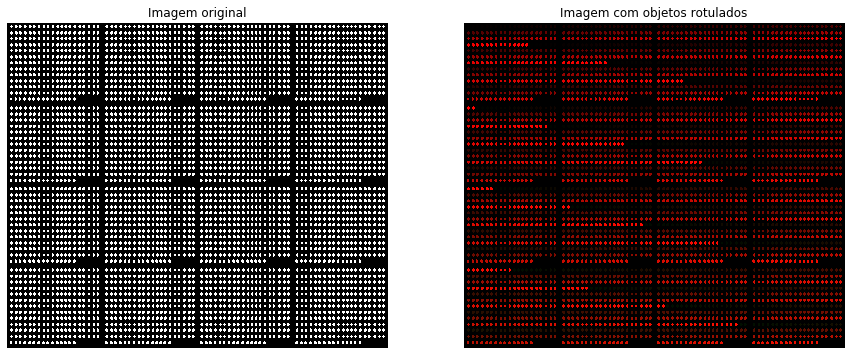

In [7]:
img = cv2.imread("..\\images\\muitas_bolhas.png",0)
print("Foram contados " + str(colorful_labeling(img)[0]) + " objetos na figura")

<a id='script2'></a>

<h2>3. Script de contagem de objetos com buracos</h2>

<p style='text-align: justify;'>Esta seção descreverá um script realizado em Python que recebe uma imagem contendo objetos a serem contados, sendo que alguns destes objetos possuem regiões com a mesma cor de fundo em seu interior. A ideia é contar quantos destes objetos satisfazem essa condição através de uma série de passos para tal. Para este algoritmo, foram utilizadas as mesmas bibliotecas da Seção 2.1.</p>



<a id='funcao2'></a>

<h3>3.1 Função de remoção dos objetos da borda</h3>

<p style='text-align: justify;'>Para possibilitar a contagem de objetos que contenham buracos, o primeiro passo foi criar uma função capaz de remover os objetos que tocam a borda da figura. Isto é necessário visto que não se tem conhecimento do comportamento dos objetos além do que está representado na figura. A função abaixo se assemelha a de rotulação padrão, sendo o diferencial na forma de percorrer a matriz. Neste caso, só as quatro bordas da matriz são consideradas para a procura de objetos, que, em vez de serem rotulados, recebem a cor de fundo da imagem no <i>Flood fill</i>, ou seja, são deletados da imagem.</p>

In [8]:
def remove_bubbles_from_board(img, show_img = True, fignum = 1):
    
    if show_img:
        plt.figure(fignum,[15,15])
        plt.subplot(121)
        plt.imshow(img,cmap="gray")
        plt.axis("off")
        plt.title("Imagem original")
    
    nobjects = 0
    
    for i in range(np.shape(img)[0]):
        if img[i,0] == 255:
            cv2.floodFill(img,None,(0,i),0)
            nobjects +=1
        if img[i,-1] == 255:
            cv2.floodFill(img,None,(np.shape(img)[1]-1,i),0)
            nobjects +=1
    for j in range(np.shape(img)[1]):
        if img[0,j] == 255:
            cv2.floodFill(img,None,(j,0),0) 
            nobjects +=1
        if img[-1,j] == 255:
            cv2.floodFill(img,None,(j,np.shape(img)[0]-1),0)
            nobjects +=1
        
    if show_img:
        plt.subplot(122)
        plt.imshow(img,cmap="gray")
        plt.axis("off")
        plt.title("Imagem sem objetos nas bordas")
    
    return nobjects

Abaixo, tem-se um exemplo de aplicação de remoção dos objetos da borda:

Foram removidos 11 objetos das bordas


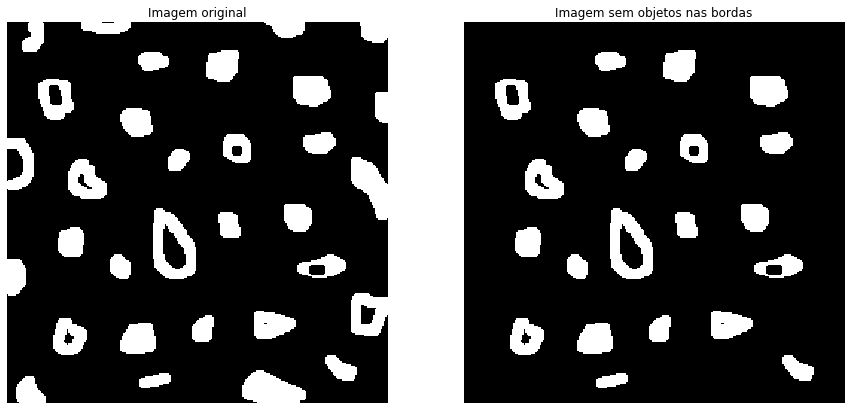

In [9]:
img = cv2.imread("..\\images\\bolhas.png",0)
print("Foram removidos " + str(remove_bubbles_from_board(img)) + " objetos das bordas")

<a id='funcao3'></a>

<h3>3.2 Função de rotulação dos objetos com buracos</h3>

<p style='text-align: justify;'>A função abaixo realiza o processo completo de contagem de objetos com buracos. O primeiro passo, como mostrado anteriormente, é remover os objetos que tocam a borda da imagem. Em seguida, aplica-se o algoritmo de rotulação dos objetos, de forma que estes passam a ter cores diferentes. Após isso, aplica-se o <i>Flood fill</i> no primeiro pixel da imagem, que estará na cor de fundo, uma vez que todos os objetos da borda tenham sido removidos. Pode-se escolher uma cor arbitrária para este processo de preenchimento, basta que seja diferente da cor de fundo anterior e das cores do processo de rotulação. A cor escolhida foi (255,255,254), visto que é a última capaz de rotular um objeto através da função "colorful_labeling".</p>

<p style='text-align: justify;'>O processo de rotulação é novamente repetido, porém, a cor de fundo foi modificada, restando a cor preta apenas nos buracos dos objetos. Como o objeto de interesse agora são os buracos de cor preta (0,0,0), o parâmetro da função de rotulação para a cor dos objetos desejados passa a ser preto também. A cor de início para este processo de labeling foi escolhido arbitrariamente para facilitar a visualização. O resultado desta etapa será a contagem do número de buracos na imagem.</p>

<p style='text-align: justify;'>Para saber quantos objetos possuem pelo menos um buraco, deve-se desconsiderar os buracos que fazem parte de um mesmo objeto. A forma utilizada para fazer isto foi obter a cor do objeto que contém o buraco através da lista "object_with_hole_color". Para tal, basta obter a cor do pixel diretamente a esquerda do primeiro pixel do buraco. Após isso, foi necessário remover as cores repetidas da lista (mesmo objeto). Com isso, tem-se a quantidade de objetos com pelo menos um buraco.</p>

In [10]:
def bubbles_with_holes(img):
    #Remover objetos da borda
    nBoard = remove_bubbles_from_board(img,True,3)
    
    #Rotular objetos em geral
    nObjects, colors, col_img, obPoints = colorful_labeling(img, (255,255,255), (0,127,0), True, 1)
    
    #Modificar a cor de fundo da imagem
    cv2.floodFill(col_img,None,(0,0),newVal=(255,255,254))
    
    colors = increment_color(colors)
    
    #Rotular os buracos
    nHoles, colors, col_img1, obPoints = colorful_labeling(col_img, (0,0,0), (0,3,140), True, 2)
    
    #Cor do objeto que contém o buraco
    object_with_hole_color = []    
    for i in obPoints:
        object_with_hole_color.append(col_img1[i[0],[i[1]-1]][:])
    
    #Contagem de objetos com pelo menos um buraco
    L = {array.tostring(): array for array in object_with_hole_color}    
    nObjectsWithHoles = len(L)
    
    return nBoard, nObjects, nHoles, nObjectsWithHoles

<a id='result2'></a>

<h3>3.3 Resultados</h3>

Abaixo tem-se um exemplo de imagem com objetos que podem possuir mais de um buraco. São exibidas as mudanças nas imagens ao longo dos processos de rotulação, bem como as contagens de objetos de furos.

Foram removidos 11 objetos da borda
Restaram 21 objetos na figura
Existem 9 objetos com pelo menos um buraco
Existem 13 buracos no total


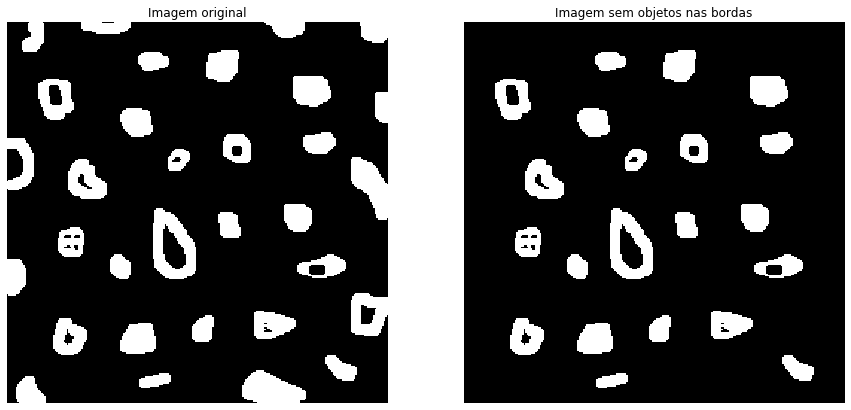

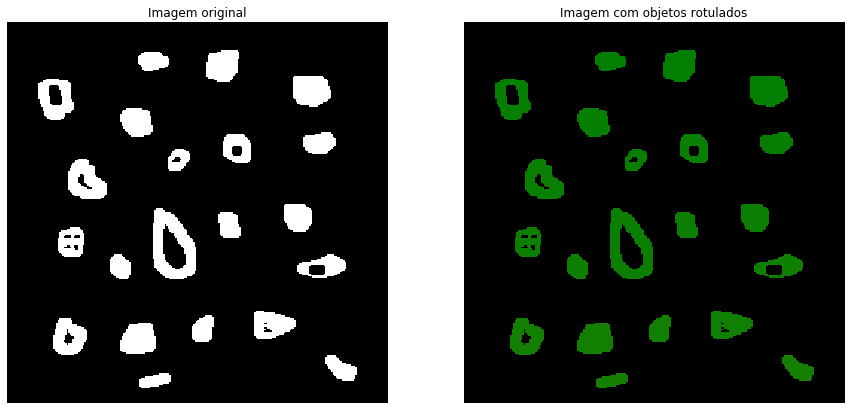

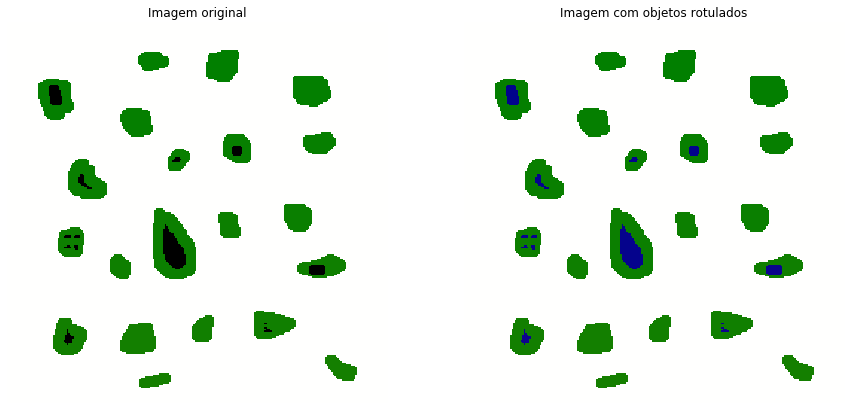

In [11]:
img = cv2.imread("..\\images\\bolhas_mod.png",0)

nBoard, nObjects, nHoles, nObjectsWithHoles = bubbles_with_holes(img)

print("Foram removidos " + str(nBoard) + " objetos da borda")
print("Restaram " + str(nObjects) + " objetos na figura")
print("Existem " + str(nObjectsWithHoles) + " objetos com pelo menos um buraco")
print("Existem " + str(nHoles) + " buracos no total")